## 1. In vivo Table T2 CoV MAPE

In [20]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import os
import sys

# Get the current working directory (from where the notebook is running)
current_dir = os.getcwd()

# Add the project root directory to the Python path
project_root = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.append(project_root)


from utils.qmri_utils import *
from utils.ada_utils import *


t2map_dir = 'recon_1mm_t2map_no_prior_jmri'
t2feta_csv = compute_t2_per_tissue_feta(t2map_dir)
print(t2feta_csv)
t2feta_csv.to_csv('/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/t2_feta.tsv', sep='\t', index=False)


        sub     ses  scanner roi        mean         std  nvoxel
0   sub-002  ses-01  freemax  gm  160.582779   35.479584  122550
1   sub-002  ses-01  freemax  wm  117.357925   28.282976  303693
2   sub-002  ses-02     sola  gm  160.942535   45.326946  201852
3   sub-002  ses-02     sola  wm  113.031029   21.616983  343225
4   sub-003  ses-01  freemax  gm  166.935028   36.428547  117847
5   sub-003  ses-01  freemax  wm  115.588051   14.808193  292766
6   sub-003  ses-02     sola  gm  155.932968   35.477695  186047
7   sub-003  ses-02     sola  wm  109.513916   15.725055  334042
8   sub-003  ses-03  freemax  gm  166.299301   36.035652  119559
9   sub-003  ses-03  freemax  wm  114.818344   14.694476  290579
10  sub-003  ses-04  freemax  gm  165.667648   35.820671  118727
11  sub-003  ses-04  freemax  wm  114.953148   14.467239  291788
12  sub-004  ses-01  freemax  gm  175.283081   38.675812   90634
13  sub-004  ses-01  freemax  wm  114.692406   16.430141  205114
14  sub-004  ses-02     s

# 3. IMPORT T2 MAPS/RECONSTRUCTION/FETA/JHU/HO MAPS & LABELS

In [23]:

#0.55  Tesla
bids_path = '/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/'
csv_path = '/home/mroulet/Documents/Data/qMRI/CHUV/freemax/dicom/logs/'
t2map_dir = "recon_1mm_t2map_no_prior_jmri"

# PRJ-004
csvs = ['2024083017_17510000.csv', # Emeline ses-01
        '2024090320_55420000.csv', # Misha ses-01
        '2024090618_37050000.csv', # Alyssa ses-01
        '2024090811_14320000.csv', # Rizhong ses-01
        '2024091017_53530000_1.csv', # Misha ses-03
        '2024091017_53530000_2.csv', # Misha ses-04
        '2024091020_45220000.csv', # Yasser ses-01
        '2024091320_23400000.csv', # Alyssa ses-03
        '2024091321_22550000.csv', # Michael ses-01
        '2024091322_27490000.csv', # Felice ses-01
        '2024092720_10110000.csv', # Nataliia ses-01
        '2024092719_10310000.csv', # Andreea ses-01
        '2024102120_48480000.csv', # Jaime ses-01
        # HIGH FIELD
        '2024083019_26300000.csv', # Emeline sub-002_ses-02
        '2024090322_28560000.csv', # Misha sub-003_ses-02
        '2024090619_26370000.csv', # Alyssa sub-004_ses-02
        '2024090812_21470000.csv', # Rizhong sub-005_ses-02
        '2024091021_57280000.csv', # Yasser sub-006_ses-02
        '2024091319_13240000.csv', # Michael sub-007_ses-02
        '2024091318_13560000.csv', # Felice sub-008_ses-02
        '2024092721_25410000.csv', # Nataliia sub-009_ses-02
        '2024102616_18560000.csv', # Andreea sub-010_ses-02
        '2024102122_28450000.csv' # Jaime sub-011_ses-02
        ]

# Import metadata from logs
for i,csv in enumerate(csvs):
    if i==0:
        metadata = csv2df(os.path.join(csv_path,csv))
    else:
        metadata = pd.concat([metadata,csv2df(os.path.join(csv_path,csv))], ignore_index=True)

# Import maps
t2map, t2recon, jhu, ho, feta = import_maps_as_dict(metadata, bids_path,t2map_dir)
# dict keys: sub, ses, te for recon, val: data array

# Get labels name and index
labels_ho, labels_jhu, labels_feta = get_labels_as_dict()
# dict keys: index, name

# Get T2 per ROI - intersection between FETA & JHU/HO labels + erode by 3
t2ho, t2jhu, t2ho_csv, t2jhu_csv= get_t2_per_roi(t2map,feta,ho,labels_ho,jhu,labels_jhu)
# dict keys: name, data,n_data, mean, median, std
t2ho_csv.to_csv('/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/t2_ho.tsv', sep='\t', index=False)
t2jhu_csv.to_csv('/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/t2_jhu.tsv', sep='\t', index=False)

*************** Import Maps ****************
sub-002_ses-01
/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_t2map_no_prior_jmri/sub-002/ses-01/anat
t2map:  /home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_t2map_no_prior_jmri/sub-002/ses-01/anat/sub-002_ses-01_recon_1mm_sim-0_t2map_ada-gaussian.nii.gz
feta : /home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_feta/sub-002/ses-01/anat/sub-002_ses-01_te-114_recon_1mm_feta.nii.gz
jhu label:  /home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_jhu/sub-002/ses-01/anat/sub-002_ses-01_recon_1mm_jhu.nii.gz
ho_label:  /home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_ho/sub-002/ses-01/anat/sub-002_ses-01_recon_1mm_ho.nii.gz
/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm/sub-002/ses-01/anat/sub-002_ses-01_te-114_recon_1mm.nii.gz
/ho

/home/mroulet/miniconda3/envs/gomar/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mroulet/miniconda3/envs/gomar/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/mroulet/miniconda3/envs/gomar/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mroulet/miniconda3/envs/gomar/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/mroulet/miniconda3/envs/gomar/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


sub-002 ses-02
sub-003 ses-01
sub-003 ses-02
sub-003 ses-03
sub-003 ses-04
sub-004 ses-01
sub-004 ses-02
sub-004 ses-03
sub-005 ses-01
sub-005 ses-02
sub-006 ses-01
sub-006 ses-02
sub-007 ses-01
sub-007 ses-02
sub-008 ses-01
sub-008 ses-02
sub-009 ses-01
sub-009 ses-02
sub-010 ses-01
sub-010 ses-02
sub-011 ses-01
sub-011 ses-02


In [20]:
t2ho['sub-010']['ses-02'][1].keys()

dict_keys(['name', 'data', 'n_data', 'mean', 'median', 'std'])

In [11]:
sub = 'sub-010'
ses = 'ses-02'
t2 = t2jhu
for index, data in t2[sub][ses].items():
    stat = []
    for sub in ['sub-002','sub-003','sub-004','sub-005','sub-006','sub-007','sub-008','sub-009','sub-010','sub-011']:
        for ses in t2[sub].keys():
            
            stat.append(t2[sub][ses][index]['n_data'])
    
    print(index,"\t", stat, "\t\t", data["name"])


1 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 		 Unclassified
2 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 		 Middle cerebellar peduncle
3 	 [2067, 2325, 3121, 3280, 3036, 2956, 1958, 2240, 1920, 2957, 3128, 1371, 2168, 1993, 2235, 2388, 2336, 2144, 2496, 2296, 1910, 1997] 		 Pontine crossing tract (a part of MCP)
4 	 [531, 311, 2752, 3099, 2625, 2596, 1945, 2217, 1844, 1713, 1178, 2045, 2821, 2293, 2160, 2197, 1933, 2887, 2938, 2288, 2156, 2653] 		 Genu of corpus callosum
5 	 [3815, 3285, 4785, 4687, 4810, 4792, 2029, 2358, 2034, 4149, 4333, 2312, 2958, 2558, 2729, 2852, 2977, 3936, 4300, 3946, 4011, 4208] 		 Body of corpus callosum
6 	 [0, 0, 22, 26, 2, 4, 0, 15, 1, 7, 29, 0, 1, 2, 12, 3, 6, 0, 14, 0, 0, 5] 		 Splenium of corpus callosum
7 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 		 Fornix (column and body of fornix)
8 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 		 Corticospinal tr

### 3. Fig 1 - Methods - In Vitro T2 decay 

White Matter
MEAN COV: (0.456478743504054, 0.40944497249090817, 27)
MEAN COV: (0.837527080533237, 0.705376272857083, 27)
MEAN COV: (5.235721869865209, 2.8508959685242816, 27)
MEAN COV: (5.004885607853317, 2.1644739998743625, 27)

a=0.001 3.7037037037037037e-05
a=0.05 0.001851851851851852
a=0.01 0.00037037037037037035

RUN vs SES ANALYSIS
T-statistic: 75.0
P-value: 0.005023345351219177
DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.


SES vs SUB COV ANALYSIS
T-statistic: 0.0
P-value: 1.4901161193847656e-08
REJECT the null hypothesis: There is a significant difference between the means of the two samples.


0.55 vs 1.5 COV ANALYSIS
T-statistic: 186.0
P-value: 0.9528931677341461
DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.




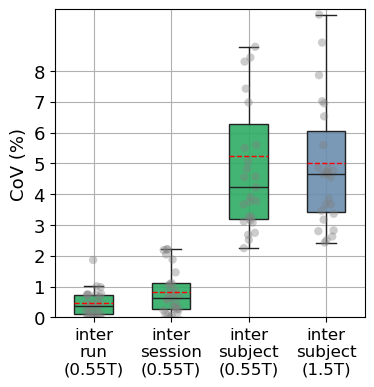

Cortical Gray Matter
Frontal Pole
Superior Frontal Gyrus
Middle Frontal Gyrus
Inferior Frontal Gyrus, pars triangularis
Inferior Frontal Gyrus, pars opercularis
Precentral Gyrus
Temporal Pole
Postcentral Gyrus
Superior Parietal Lobule
Supramarginal Gyrus, anterior division
Supramarginal Gyrus, posterior division
Angular Gyrus
Lateral Occipital Cortex, superior division
Intracalcarine Cortex
Frontal Medial Cortex
Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)
Paracingulate Gyrus
Cingulate Gyrus, anterior division
Precuneous Cortex
Cuneal Cortex
Central Opercular Cortex
Occipital Pole
Middle Temporal Gyrus, anterior division
Inferior Temporal Gyrus, anterior division
Angular Gyrus
Lateral Occipital Cortex, inferior division
Intracalcarine Cortex
Frontal Medial Cortex
Cuneal Cortex
Lingual Gyrus
Occipital Fusiform Gyrus
Occipital Pole
MEAN COV: (1.494866304937456, 1.3016362830212305, 41)
MEAN COV: (1.4293793398374437, 1.4216269209045087, 41)
MEAN COV: (17.746312447666

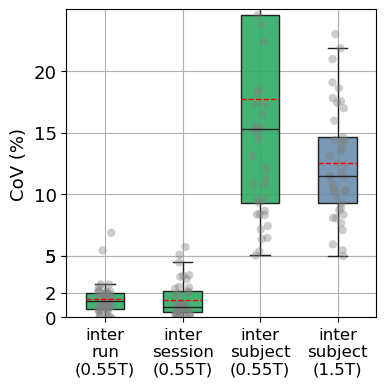

In [24]:
wm_lst = [3,4,5,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,41,42,45,46]
gm_lst = [1,2,3,4,5,6,7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42,43,48]

plot_cov_boxplot_new(t2jhu,t2ho,wm_lst, gm_lst)

In [ ]:
plot_pearson_corr_new(t2jhu,t2ho,wm_lst, gm_lst)

lf ses-01
dict_keys(['bodies', 'cmeans', 'cmaxes', 'cmins', 'cbars', 'cmedians'])


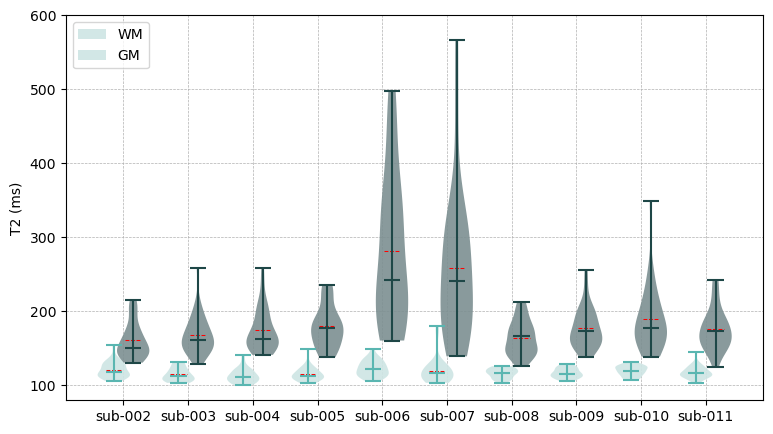

hf ses-02
dict_keys(['bodies', 'cmeans', 'cmaxes', 'cmins', 'cbars', 'cmedians'])


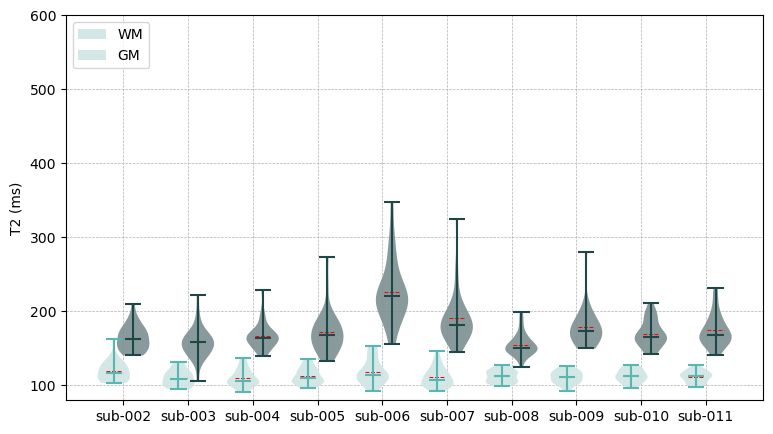

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Number of subjects and colors for WM and GM
subjects = 10
colors = ['#5ab6b1', '#1e4747']  # Color for WM and GM
colors_bis = ['#cee5e4', '#7c8f91']  # Color for WM and GM

# List of T2 datasets
t2s = [t2jhu, t2ho]  # Assuming t2jhu (WM) and t2ho (GM) are defined


for field,ses in zip(['lf', 'hf'], ['ses-01','ses-02']): 
    print(field,ses)
    roi_data = {}
    # Collect mean values for each subject for both WM and GM
    for t2 in t2s:
        for sub in ['sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011']:
            data = []
            #print(f"Processing {sub} for T2...")
            for index in wm_lst:
                mean_value = t2[sub][ses][index]["mean"]
                if np.isnan(mean_value):
                    print(f"Warning: NaN found for {sub}, ROI {index}.")
                else:
                    data.append(mean_value)
            roi_data.setdefault(sub, []).append(data)  # Store data for the subject

    # Organizing data for the violin plot
    data_for_plot = [[roi_data[sub][0] for sub in roi_data], [roi_data[sub][1] for sub in roi_data]]

    # Creating a violin plot
    plt.rc('axes', axisbelow=True)
    plt.figure(figsize=(9, 5))
    positions = np.arange(1, subjects + 1)
    plt.grid(linestyle='--',linewidth=0.5,zorder=-1) 
    plt.ylim([80,600])
    # Plot WM data
    parts_wm = plt.violinplot(data_for_plot[0], positions=positions - 0.15, showmeans=True, showmedians=True)
    # Plot GM data
    parts_gm = plt.violinplot(data_for_plot[1], positions=positions + 0.15, showmeans=True, showmedians=True)
    print(parts_wm.keys())
    # Formatting the plot
    plt.xticks(positions, roi_data.keys())  # Keep the original x-ticks
    #plt.yticks([70,80,90,100,110,120,130,140,150,160])
    plt.ylabel('T2 (ms)')

    # Set colors for WM and GM
    for pc in parts_wm['bodies']:
        pc.set_facecolor(colors_bis[0])  # WM color
        pc.set_alpha(0.9)

    for pc in parts_gm['bodies']:
        pc.set_facecolor(colors_bis[1])  # GM color
        pc.set_alpha(0.9)


    parts_gm['cmedians'].set_color(colors[1])  # GM mean color
    parts_wm['cmedians'].set_color(colors[0])  # WM mean color
    parts_gm['cbars'].set_color(colors[1])  # GM mean color
    parts_wm['cbars'].set_color(colors[0])  # WM mean color
    parts_gm['cmins'].set_color(colors[1])  # GM mean color
    parts_wm['cmins'].set_color(colors[0])  # WM mean color
    parts_gm['cmaxes'].set_color(colors[1])  # GM mean color
    parts_wm['cmaxes'].set_color(colors[0])  # WM mean color
    parts_gm['cmeans'].set_color(colors[1])  # GM mean color
    """ parts_gm['cmedians'].set_color('black')  # GM mean color
    parts_wm['cmedians'].set_color('black')  # WM mean color
    parts_gm['cbars'].set_color('black')  # GM mean color
    parts_wm['cbars'].set_color('black')  # WM mean color
    parts_gm['cmins'].set_color('black')  # GM mean color
    parts_wm['cmins'].set_color('black')  # WM mean color
    parts_gm['cmaxes'].set_color('black')  # GM mean color
    parts_wm['cmaxes'].set_color('black')  # WM mean color
    parts_gm['cmeans'].set_color('black')  # GM mean color """
    parts_gm['cmeans'].set_linestyle('--')  # Set mean line style to dashed
    parts_wm['cmeans'].set_color('red')  # GM mean color
    parts_gm['cmeans'].set_color('red')  # GM mean color
    a=1.5
    parts_wm['cmeans'].set_linestyle('--')  # Set mean line style to dashed
    parts_wm['cmeans'].set_linewidth(0.75)  # Set mean line style to dashed
    parts_gm['cmeans'].set_linewidth(0.75)  # Set mean line style to dashed
    parts_gm['cbars'].set_linewidth(a)  # Set mean line style to dashed
    parts_wm['cbars'].set_linewidth(a)  # Set mean line style to dashed
    parts_gm['cmedians'].set_linewidth(a)  # Set mean line style to dashed
    parts_wm['cmedians'].set_linewidth(a)  # Set mean line style to dashed
    parts_wm['cmaxes'].set_linewidth(a)  # Set mean line style to dashed
    parts_gm['cmaxes'].set_linewidth(a)  # Set mean line style to dashed
    parts_wm['cmins'].set_linewidth(a)  # Set mean line style to dashed
    parts_gm['cmins'].set_linewidth(a)  # Set mean line style to dashed

    plt.legend(['WM', 'GM'], loc='upper left', frameon=True)
    plt.savefig(f'/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/figures/violin_{field}.pdf')
    plt.show()

#plot_violin(t2jhu,t2ho,wm_lst, gm_lst)

# COLORSCALE T2 & RESIDUALS MAPS

In [60]:
## NOT IN USE

import numpy as np
from cmcrameri import cm

def color_log_remap(ori_cmap, lo_lev, up_lev):
    """
    color_log_remap: lookup of the original color map table according to a "log-like" curve.
    The log-like curve contains a linear part and a logarithmic part; the size of the parts
    depends on the range (lo_lev, up_lev).

    Arguments:
        ori_cmap: original colormap, provided as an Nx3 matrix
        lo_lev: lower level of the range to be displayed
        up_lev: upper level of the range to be displayed

    Returns:
        modified colormap
    """
    assert up_lev > 0, "upper level must be positive"
    assert up_lev > lo_lev, "upper level must be larger than lower level"

    map_length = ori_cmap.shape[0]
    e_inv = np.exp(-1.0)
    a_val = e_inv * up_lev
    m_val = max(a_val, lo_lev)
    
    # This is to ensure that the value is slightly above 1/map_length
    b_val = (1.0 / map_length) + (a_val >= lo_lev) * ((a_val - lo_lev) / (2 * a_val - lo_lev))
    b_val += 1e-7

    # Initialize logCmap with zeros, and assign the first row as oriCmap's first row
    log_cmap = np.zeros_like(ori_cmap)
    log_cmap[0, :] = ori_cmap[0, :]

    # Logarithmic portion factor
    log_portion = 1.0 / (np.log(m_val) - np.log(up_lev))

    # Compute the remapped colormap
    for g in range(1, map_length):
        f = 0.0
        x = g * (up_lev - lo_lev) / map_length + lo_lev
        
        if x > m_val:
            # Logarithmic segment of the curve
            f = map_length * ((np.log(m_val) - np.log(x)) * log_portion * (1 - b_val) + b_val)
        else:
            if lo_lev < a_val and x > lo_lev:
                # Linear segment of the curve
                f = map_length * ((x - lo_lev) / (a_val - lo_lev) * (b_val - (1.0 / map_length))) + 1.0
            elif x <= lo_lev:
                # Lowest valid color
                f = 1.0
        
        # Lookup from the original colormap
        log_cmap[g, :] = ori_cmap[min(map_length - 1, int(np.floor(f))), :]

    return log_cmap

# Define a helper function to sample the colormap into an Nx3 array
def sample_cmap(cmap,N=256):
    """Sample a colormap (cmap) into an Nx3 array."""
    return cmap(np.linspace(0, 1, N))[:, :3]  # Get only RGB values, dropping any alpha channel

# Use the colormap 'navia' from cmcrameri
log_navia = color_log_remap(sample_cmap(cm.navia, N=256),0,200)  # Convert to Nx3 array


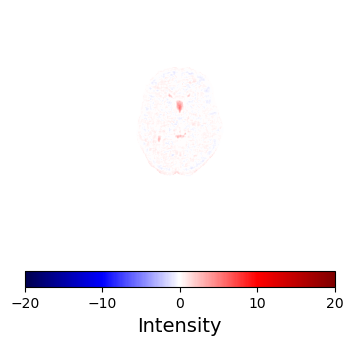

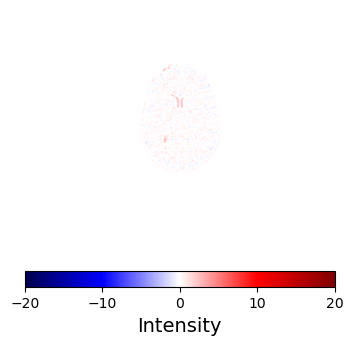

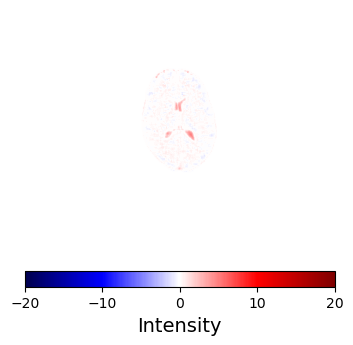

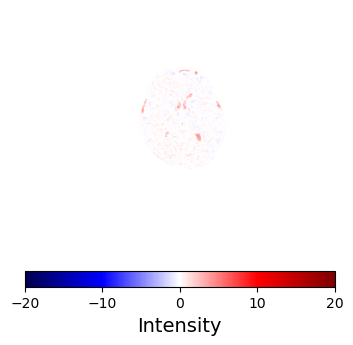

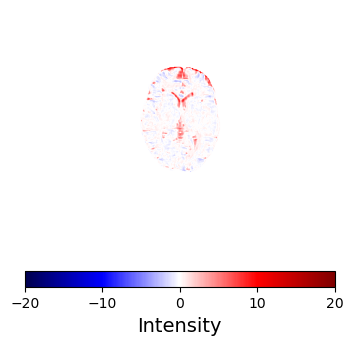

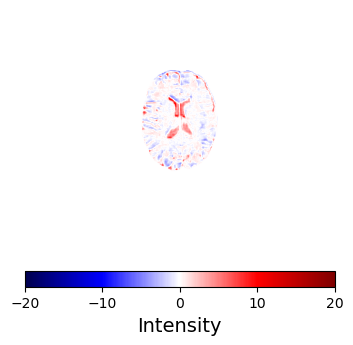

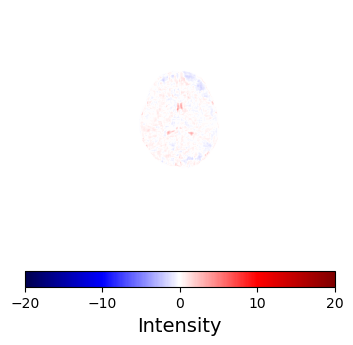

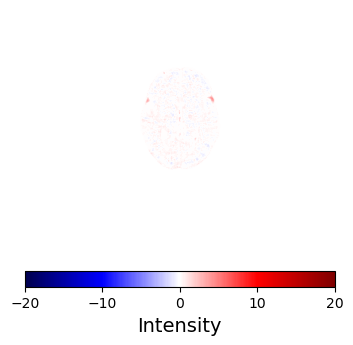

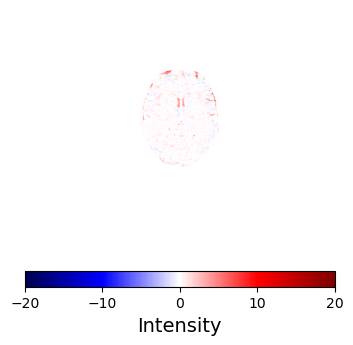

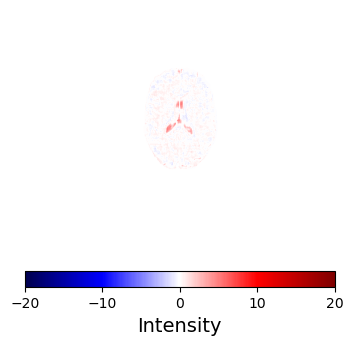

In [71]:
from cmcrameri import cm
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

""" x = np.linspace(0, 100, 100)[None, :]
plt.imshow(x, aspect='auto', cmap=cm.navia) # or any other colourmap
plt.axis('off') """
subs = ['sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011']
#subs = ['sub-002']
t2 = False
for sub in subs:
    ses = 'ses-01'
    slice_index ={'sub-002':90,
                'sub-003':120,
                'sub-004':115,
                'sub-005':105,
                'sub-006':105,
                'sub-007':105,
                'sub-008':100,
                'sub-009':108,
                'sub-010':115,
                'sub-011':120}
    if t2:
        flnm = f"/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_t2map_no_prior_jmri/{sub}/{ses}/anat/{sub}_{ses}_recon_1mm_sim-0_t2map_ada-gaussian.nii.gz"
    else:
        flnm = f"/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_t2map_no_prior_jmri/{sub}/{ses}/anat/{sub}_{ses}_recon_1mm_sim-0_resmap_ada-gaussian.nii.gz"
    img_array = sitk.GetArrayFromImage(sitk.ReadImage(flnm))
    slice_data = img_array[slice_index[sub],:, :]

    alpha = np.ones(slice_data.shape)
    alpha[slice_data == 0] = 0

    if t2:
        plt.figure(figsize=(4,4)) 
        #im= plt.imshow(slice_data, cmap=plt.cm.colors.ListedColormap(log_navia), origin='lower',vmin=0,vmax=200,alpha=alpha) # initial 40 - 250
        im= plt.imshow(slice_data, cmap=cm.navia, origin='lower',vmin=50,vmax=300,alpha=alpha) # initial 40 - 250
        #plt.title(f'{sub} - slice {slice_index[sub]}')
        plt.axis('off')  # Turn off the axis
        cbar = plt.colorbar(im,orientation='horizontal')
        cbar.set_label('Intensity', fontsize=14) 
        plt.savefig(f"/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/noprior/maps_invivo_noprior/t2map_{sub}_{ses}.pdf")
        plt.show()
    else:
        plt.figure(figsize=(4,4)) 
        #im= plt.imshow(slice_data, cmap=plt.cm.colors.ListedColormap(log_navia), origin='lower',vmin=0,vmax=200,alpha=alpha) # initial 40 - 250
        im= plt.imshow(slice_data, cmap='seismic', origin='lower',vmin=-20,vmax=20,alpha=alpha) # initial 40 - 250
        #plt.title(f'{sub} - slice {slice_index[sub]}')
        plt.axis('off')  # Turn off the axis
        cbar = plt.colorbar(im,orientation='horizontal')
        cbar.set_label('Intensity', fontsize=14) 
        plt.savefig(f"/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/noprior/maps_invivo_noprior/resmap_{sub}_{ses}.pdf")
        plt.show()

# FEASIBILITY RELAXATION CURVE

Label: 3
  TE: 114, Mean: 141.99, Std: 12.90
  TE: 132, Mean: 121.87, Std: 13.57
  TE: 150, Mean: 104.77, Std: 13.43
  TE: 176, Mean: 83.86, Std: 13.13
  TE: 202, Mean: 67.57, Std: 12.90
  TE: 229, Mean: 54.28, Std: 12.36
  TE: 255, Mean: 44.00, Std: 11.77
  TE: 273, Mean: 38.35, Std: 11.35
  TE: 299, Mean: 31.66, Std: 10.80
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.13081896500617685
        x: [ 3.693e+02  1.176e+02]
      nit: 13
      jac: [-3.747e-07 -9.576e-07]
     nfev: 78
     njev: 26
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


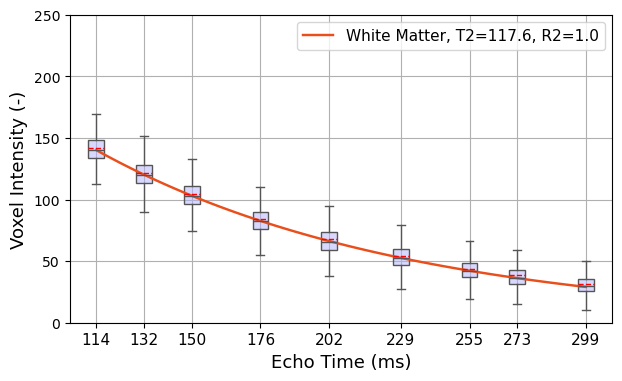

In [26]:
# Figure method relaxation curve based on recon_1,, 
import os
import nibabel as nib
import numpy as np
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np


from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

import statsmodels.api as sm
from scipy.optimize import minimize, differential_evolution, curve_fit

path_recon = '/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm/sub-003/ses-01/anat/'
path_label = '/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_feta/sub-003/ses-01/anat/sub-003_ses-01_te-114_recon_1mm_feta.nii.gz'

label_array = sitk.GetArrayFromImage(sitk.ReadImage(path_label))
import os
import SimpleITK as sitk
import numpy as np

# Define the folder path
path_recon = '/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm/sub-003/ses-01/anat/'

# List to store the images and their TE values
images = {}
te_values = []

# Iterate through the files in the directory
for filename in os.listdir(path_recon):
    if filename.endswith('.nii.gz') and 'sub-003_ses-01_te-' in filename:
        # Extract TE value from the filename
        te_value = int(filename.split('_te-')[1].split('_')[0])
        te_values.append(te_value)
        
        # Load the image
        image = sitk.ReadImage(os.path.join(path_recon, filename))
        image_array = sitk.GetArrayFromImage(image)
        
        # Store the image array in the dictionary with the TE value as the key
        images[te_value] = image_array



from scipy.optimize import curve_fit
# Sort TE values
te_values.sort()
# Filter for specific labels
labels_of_interest = [3]

# Initialize a dictionary to store the label and corresponding voxel values
label_dict = {}

# Iterate through each label of interest and collect the corresponding voxel values from each image
for label in labels_of_interest:
    # Find the voxel indices for the current label
    voxel_indices = np.where(label_array == label)
    
    # Collect the voxel values for each TE value
    voxel_values = {}
    for te in te_values:
        voxel_values[te] = images[te][voxel_indices]
    
    # Store the voxel values in the dictionary
    label_dict[label] = voxel_values

    # Calculate and print the mean and standard deviation for each label of interest and TE value
for label in labels_of_interest:
    print(f"Label: {label}")
    for te in te_values:
        voxels = label_dict[label][te]
        mean_val = np.mean(voxels)
        std_val = np.std(voxels)
        print(f"  TE: {te}, Mean: {mean_val:.2f}, Std: {std_val:.2f}")

scattercolors = ['#36a9e1', '#2fac66', '#e94e1b', 'red', '#9370DB']

# Define the mono-exponential function for curve fitting
def gauss_model(te, M, T2):
    return M * np.exp(-te / T2)

def gauss_obj(params, TEeffs, signal):
        k, t2 = params
        model = gauss_model(TEeffs, k, t2)
        residuals = signal - model

        return np.sum(residuals**2) / len(signal)

# Create the plot
fig, axs = plt.subplots(figsize=(7, 4))
boxcol = '#555555'
colors = ['#e94e1b','#2fac66']
rois = ['White Matter']


for i, label in enumerate(labels_of_interest):
    vx_med = []
    TEs = []

    for te in te_values:
        data = label_dict[label][te]
        bplot = axs.boxplot(data, positions=[te], showfliers=False, widths=6, patch_artist=True,
                            boxprops=dict(edgecolor=boxcol), whiskerprops=dict(color=boxcol),
                            medianprops=dict(color=boxcol), capprops=dict(color=boxcol),
                            meanline=True, showmeans=True, meanprops=dict(color='red'))
        
        for patch in bplot['boxes']:
            patch.set_facecolor((0.7, 0.7, 1, 0.5))
        
        vx_med.append(np.median(data))
        TEs.append(te)

    TEs = np.array(TEs)
    vx_med = np.array(vx_med)
    
    # Initial guesses for M, T2, and C
    initial_guess = [400, 200, 5]
    
    # Perform curve fitting
    #params, covariance = curve_fit(mono_exp, TEs, vx_med, p0=initial_guess, bounds=([0, 10, 5], [40000, 4000, 20]))

    fit_params =    {   "initial_guess": [630, 165],
                                "param_bounds": [(vx_med[0],10000),(10,600)],
                                "solver": "L-BFGS-B",
                                "options": {
                                    #"gtol": 1e-16,
                                    "ftol": 1e-6,
                                    "maxls": 50,
                                    #"maxiter": 1000,
                                    "disp": False
                                }
                            }

    result = minimize(gauss_obj, 
                          fit_params['initial_guess'], 
                          args=(TEs, vx_med),
                          method = fit_params['solver'], 
                          bounds=fit_params['param_bounds'],
                          options=fit_params['options'])
    print(result)
    # Compute R2
    fitted_values = gauss_model(TEs, *result.x)
    residuals = vx_med - fitted_values
    total_sum_squares = np.sum((vx_med - np.median(vx_med))**2)
    sum_squares_residuals = np.sum(residuals**2)
    r_squared = np.round(1 - (sum_squares_residuals / total_sum_squares), 5)

    # Plot the fitted curve
    x = np.linspace(min(te_values), max(te_values), 100)
    y = gauss_model(x, *result.x)
    
    axs.set_ylabel('Voxel Intensity (-)', fontsize=13)
    axs.set_xlabel('Echo Time (ms)', fontsize=13)
    axs.set_xticks(te_values)
    axs.set_xticklabels([str(te) for te in te_values],fontsize=11)
    axs.grid(True, zorder=0)
    axs.set_xlim([min(te_values) - 10, max(te_values) + 10])
    axs.set_ylim([-50, max(vx_med) + 200])
    axs.plot(x, y, linestyle='-', color=colors[i], alpha=1, linewidth='1.75',
             label=f"{rois[i]}, T2={np.round(result.x[1], 1)}, R2={np.round(r_squared, 2)}")
    axs.legend(loc='upper right', fontsize=11)
    axs.set_ylim([0,250])

plt.savefig('/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/figures/relax_curve_gm.pdf',transparent=True)
plt.show()


